# Import Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

# read csv file in data-frame panel

In [2]:
df1 = pd.read_csv("Bangalore  house data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# .shape shows no of rows & no of columns of data

In [3]:
df1.shape

(13320, 9)

# Area type 

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Delete unwanted column from dataset using .drop()

In [5]:
df2 = df1.drop(['area_type', 'society', 'availability'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


# Find total no o null values in each column using .isnull().sum

In [6]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

# Fill null values of 'balcony' column using .fillna()

In [7]:
mean_value = df2['balcony'].mean()

In [8]:
df2['balcony'].fillna(int(df2['balcony'].mean()))

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    1.0
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13320, dtype: float64

# Delete null valued row using .dropna()

In [9]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df3.shape
df3


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


# Shows unique values of a column

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

# create new column to store unique value after tokenize each value using lamba func

In [12]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\risha\AppData\Local\Temp\ipykernel_20324\3303903377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df3.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


# Find error value in 'total_sqft' column

In [14]:
df3[df3.BHK>20]

,location,size,total_sqft,bath,balcony,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [15]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

*using a function 'is_float' check which vaues of this column are float value, and show non float value using apply func and using '~' before the value*

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,balcony,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


## Remove error value or convert it to sqft

*Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple*

In [18]:
def convert_to_sqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try: 
        return float(x)
    except: 
        return None

In [19]:
convert_to_sqft('1200')

1200.0

In [20]:
convert_to_sqft('1000 - 1285')

1142.5

In [21]:
convert_to_sqft('1000Sq. Meter	')

# Create a copy of dataframe df3 and store corrected sqft value to new dataframe df4

In [22]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_to_sqft)

*check if any error data is present in new dataframe or not*

In [23]:
df4[~df4['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,balcony,price,BHK


In [24]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [25]:
df4.isnull().sum()

location       0
size           0
total_sqft    42
bath           0
balcony        0
price          0
BHK            0
dtype: int64

In [26]:
df5 = df4.copy()
df5.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


# creating 'price_per_sqft' column using Feature Engineering

In [27]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head(10)

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


# Count total unique locations 

 *Location is a categorical feature/tax data, too many location also can create problems*

In [28]:
len(df5.location.unique())

1265

# How many data points are available per location

In [29]:
df5.location = df5.location.apply(lambda x: x.strip())

*'location_stats' variable shows aggregate data that is grouped by location in column*

In [30]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

# No of location that has less that 10 data points

In [31]:
len(location_stats[location_stats<=10])

1017

# List of location that has less that 10 data points

In [32]:
location_stats_less_10 = location_stats[location_stats<=10]
location_stats_less_10

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

# Store locations' datapoint to 'other' row that has less than 10 data point

In [33]:
df5.location = df5.location.apply(lambda x: 'Other' if x  in location_stats_less_10 else x)
len(df5.location.unique())

238

In [34]:
df5.head(50)

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.00,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.00,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.00,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.00,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.00,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.00,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,3 BHK,1310.00,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.00,2.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.00,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.00,2.0,1.0,38.00,2,3800.000000


# Find error data from sqft and BHK

In [35]:
df5[df5.total_sqft/df5.BHK<300].head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [36]:
df5.shape

(12710, 8)

# Create new dataframe df6 and store errorless data

In [37]:
df6 = df5[~(df5.total_sqft/df5.BHK<300)]
df6.shape

(12055, 8)

# Remove outliers from 'price_per_sqft' column

In [38]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

*remove 'price_per_sqft' outliers from per location  *

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(9848, 8)

# Remove higher price of less no. of BHK than more no. of BHK (remove outliers)

*plot a graph to check the prices' differences of same sqft. with different BHK *
*|| Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like*

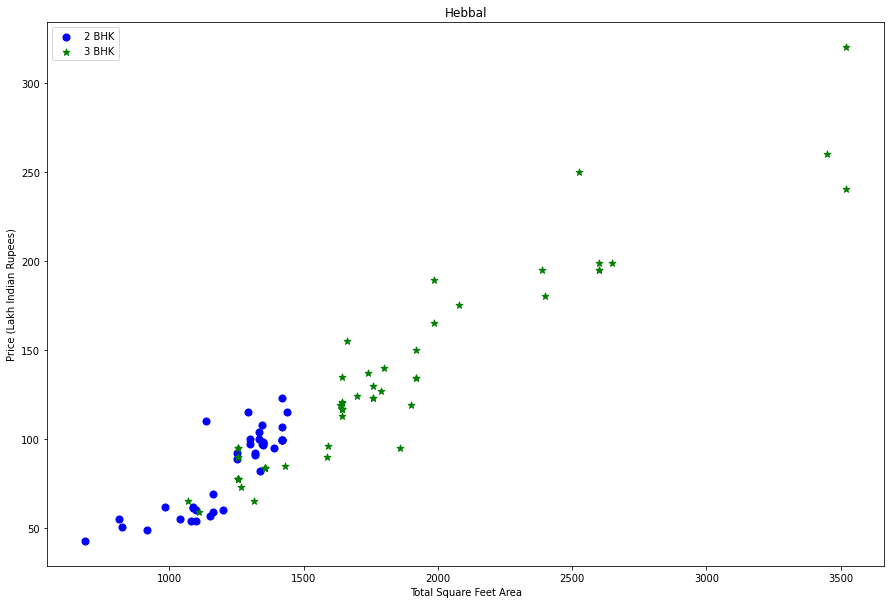

In [47]:
def plot_scatter_chart(df, location):
    #create two diff dataframes
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    #plot scatterplot
    plt.scatter(bhk2.total_sqft,bhk2.price, color = 'blue',label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price, marker='*', color = 'green',label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Hebbal")